### Basile Álvarez Andrés José
### Keller Ascencio Rodolfo Andrés

# MLP

## 1.- Preprocesamiento

In [1]:
# pip install pandas

In [1]:
import pandas as pd

- Importamos los tres conjuntos de datos de cyberbullying

In [2]:
cyberbullying_train_df = pd.read_csv('cyberbullying_train.csv')  
cyberbullying_test_df = pd.read_csv('cyberbullying_test.csv')  
cyberbullying_val_df = pd.read_csv('cyberbullying_val.csv')  

In [3]:
cyberbullying_train_df.head()

,tweet_text,cyberbullying_type
0,@AntonSirius @erinspice @prpltnkr @ChiefElk oh...,other_cyberbullying
1,"Ladies ""Bedroom Bully"" The Mix Cd By @GappyRan...",not_cyberbullying
2,RT @_bobbidana: Never thought I'd say this but...,not_cyberbullying
3,She is intellectual terrorists and world suffe...,religion
4,You saudias are not friends of Muslim idiots c...,religion


- Los elementos ya cuentan con etiquetas de clase, siendo estos cyberbullying_type

In [4]:
len(cyberbullying_train_df), len(cyberbullying_test_df), len(cyberbullying_val_df)

(33384, 7154, 7154)

In [5]:
cyberbullying_train_df.tail()

,tweet_text,cyberbullying_type
33379,Missing school for the Grey Cup festivall at N...,not_cyberbullying
33380,"Seriously, ""lady"" is what my mom calls her clo...",gender
33381,"Same as religion, one rule for muslims ,one ru...",religion
33382,@TheOmegaKira @slashdot doesn't look like I am.,other_cyberbullying
33383,CLOUD (edited): “It’s lazy for a comedian to b...,gender


- Verifica cadenas vacias

In [6]:
cyberbullying_train_df['tweet_text'].isna().sum(), cyberbullying_test_df['tweet_text'].isna().sum(), cyberbullying_val_df['tweet_text'].isna().sum()

(0, 0, 0)

- Elimina duplicados

In [7]:
cyberbullying_train_df = cyberbullying_train_df.drop_duplicates(subset=['tweet_text'])
len(cyberbullying_train_df)

32534

In [8]:
cyberbullying_test_df = cyberbullying_test_df.drop_duplicates(subset=['tweet_text'])
len(cyberbullying_test_df)

7119

In [9]:
cyberbullying_val_df = cyberbullying_val_df.drop_duplicates(subset=['tweet_text'])
len(cyberbullying_val_df)

7118

In [10]:
cyberbullying_train_df.sort_values(by='tweet_text', ascending=True, inplace=False)

,tweet_text,cyberbullying_type
17111,&amp; you might not get ya bitch back &amp; t...,gender
2125,@rhythmixx_ :hobbies include: fighting Mariam,other_cyberbullying
16387,I fucking hate you,gender
4867,Keeks is a bitch she curves everyone lol I w...,gender
26032,Murda Gang bitch its Gang Land,other_cyberbullying
...,...,...
31103,💕💕 the smell of blocks in the morning 💕💕,other_cyberbullying
30583,💩,other_cyberbullying
17401,😂😂😂 shame @ kat &amp; andre #MKR,not_cyberbullying
24219,😂😂😂😂😂,gender


In [11]:
cyberbullying_train_df.loc[8970].tweet_text

'@realDonaldTrump @PressSec I pray daily &amp; consider myself a good Christian woman. I don’t need to be in a building for the Lord to hear my prayers. With this pandemic, I don’t feel my first amendment right is being infringed upon.'

- Elimina cadenas de espacios

In [12]:
cyberbullying_train_df = cyberbullying_train_df[cyberbullying_train_df['tweet_text'].str.strip() != '']
cyberbullying_train_df

,tweet_text,cyberbullying_type
0,@AntonSirius @erinspice @prpltnkr @ChiefElk oh...,other_cyberbullying
1,"Ladies ""Bedroom Bully"" The Mix Cd By @GappyRan...",not_cyberbullying
2,RT @_bobbidana: Never thought I'd say this but...,not_cyberbullying
3,She is intellectual terrorists and world suffe...,religion
4,You saudias are not friends of Muslim idiots c...,religion
...,...,...
33378,Just asking which people on the planet weren't...,ethnicity
33379,Missing school for the Grey Cup festivall at N...,not_cyberbullying
33380,"Seriously, ""lady"" is what my mom calls her clo...",gender
33381,"Same as religion, one rule for muslims ,one ru...",religion


In [13]:
cyberbullying_test_df = cyberbullying_test_df[cyberbullying_test_df['tweet_text'].str.strip() != '']
cyberbullying_test_df

,tweet_text,cyberbullying_type
0,"@dankmtl Yeap, as a little Propaganda Nazi for...",religion
1,@LyndseyBoo wow!! Leave lyndsey phone alone!!!...,other_cyberbullying
2,"I'm not a man, only know how to bully people :(",other_cyberbullying
3,@urgedharry @nyazpolitics @greenlinerzjm If yo...,religion
4,Calling people dumb isnt nice :( RT @tayyoung_...,ethnicity
...,...,...
7149,@gameragodzilla @Totalbiscuit @Grummz @BenKuch...,other_cyberbullying
7150,Everyone upset about Amy Schumer's gay jokes s...,gender
7151,The way that every pyramid scheme girl was a b...,age
7152,bro you can bully the kids at school but you c...,age


In [14]:
cyberbullying_val_df = cyberbullying_val_df[cyberbullying_val_df['tweet_text'].str.strip() != '']
cyberbullying_val_df

,tweet_text,cyberbullying_type
0,But you idiot tagged and more also I'm a Muslim,religion
1,@SEXYLALA That's a dumb nigger never fuck LALA...,ethnicity
2,I never hear hispanics calling each other brow...,ethnicity
3,@Lenny_Banx nigger read it again such a dumb a...,ethnicity
4,She was a mean girl in high school. She and Mi...,age
...,...,...
7149,haha.erdogan started syrian conflict or the we...,religion
7150,@discerningmumin That's idiotic. Not holding a...,religion
7151,This is way past George Floyd. Everyone is agr...,ethnicity
7152,I'm not important. The things I'm working on a...,other_cyberbullying


- Elimina puntuación y convierte a minúsculas
- Se utiliza el método __str.translate()__ para eliminar todos los caracteres de puntuación mediante una tabla de traducción creada con el método __str.maketrans__. La constante string.punctuation contiene todos los caracteres de puntuación ASCII, que se eliminan de los valores en la columna

In [15]:
import string

In [16]:
cyberbullying_train_df['clean_text'] = cyberbullying_train_df['tweet_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
cyberbullying_train_df.head()

,tweet_text,cyberbullying_type,clean_text
0,@AntonSirius @erinspice @prpltnkr @ChiefElk oh...,other_cyberbullying,antonsirius erinspice prpltnkr chiefelk oh dea...
1,"Ladies ""Bedroom Bully"" The Mix Cd By @GappyRan...",not_cyberbullying,ladies bedroom bully the mix cd by gappyranks ...
2,RT @_bobbidana: Never thought I'd say this but...,not_cyberbullying,rt bobbidana never thought id say this but i h...
3,She is intellectual terrorists and world suffe...,religion,she is intellectual terrorists and world suffe...
4,You saudias are not friends of Muslim idiots c...,religion,you saudias are not friends of muslim idiots c...


In [17]:
cyberbullying_test_df['clean_text'] = cyberbullying_test_df['tweet_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
cyberbullying_test_df.head()

,tweet_text,cyberbullying_type,clean_text
0,"@dankmtl Yeap, as a little Propaganda Nazi for...",religion,dankmtl yeap as a little propaganda nazi for t...
1,@LyndseyBoo wow!! Leave lyndsey phone alone!!!...,other_cyberbullying,lyndseyboo wow leave lyndsey phone alone bully...
2,"I'm not a man, only know how to bully people :(",other_cyberbullying,im not a man only know how to bully people
3,@urgedharry @nyazpolitics @greenlinerzjm If yo...,religion,urgedharry nyazpolitics greenlinerzjm if you a...
4,Calling people dumb isnt nice :( RT @tayyoung_...,ethnicity,calling people dumb isnt nice rt tayyoung fuc...


In [18]:
cyberbullying_val_df['clean_text'] = cyberbullying_val_df['tweet_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
cyberbullying_val_df.head()

,tweet_text,cyberbullying_type,clean_text
0,But you idiot tagged and more also I'm a Muslim,religion,but you idiot tagged and more also im a muslim
1,@SEXYLALA That's a dumb nigger never fuck LALA...,ethnicity,sexylala thats a dumb nigger never fuck lala h...
2,I never hear hispanics calling each other brow...,ethnicity,i never hear hispanics calling each other brow...
3,@Lenny_Banx nigger read it again such a dumb a...,ethnicity,lennybanx nigger read it again such a dumb ass...
4,She was a mean girl in high school. She and Mi...,age,she was a mean girl in high school she and mim...


In [19]:
print(len(cyberbullying_train_df['clean_text']))
print(len(cyberbullying_test_df['clean_text']))
print(len(cyberbullying_val_df['clean_text']))

32534
7119
7118


In [20]:
import tensorflow as tf 

In [21]:
# Revisar si está leyendo la GPU para ejecutar el código desde allí
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## 2.- Pipeline

In [22]:
# El conjunto de entrenamiento tiene un buen equilibrio de número de tweets por clase. 
cyberbullying_train_df['cyberbullying_type'].value_counts()

ethnicity              5600
gender                 5599
age                    5573
religion               5554
not_cyberbullying      5213
other_cyberbullying    4995
Name: cyberbullying_type, dtype: int64

In [23]:
# #Cambiando valores de tipo de cyberbullying a enteros (manejar etiquetas como valores discretos)
map_cyberbullying_type = {"ethnicity":0,"gender":1, "age":2, "religion":3, "not_cyberbullying":4, "other_cyberbullying":5}

cyberbullying_train_df['cyberbullying_type'] = cyberbullying_train_df['cyberbullying_type'].replace(map_cyberbullying_type)
cyberbullying_test_df['cyberbullying_type'] = cyberbullying_test_df['cyberbullying_type'].replace(map_cyberbullying_type)
cyberbullying_val_df['cyberbullying_type'] = cyberbullying_val_df['cyberbullying_type'].replace(map_cyberbullying_type)

cyberbullying_val_df['cyberbullying_type']

cyberbullying_val_df

,tweet_text,cyberbullying_type,clean_text
0,But you idiot tagged and more also I'm a Muslim,3,but you idiot tagged and more also im a muslim
1,@SEXYLALA That's a dumb nigger never fuck LALA...,0,sexylala thats a dumb nigger never fuck lala h...
2,I never hear hispanics calling each other brow...,0,i never hear hispanics calling each other brow...
3,@Lenny_Banx nigger read it again such a dumb a...,0,lennybanx nigger read it again such a dumb ass...
4,She was a mean girl in high school. She and Mi...,2,she was a mean girl in high school she and mim...
...,...,...,...
7149,haha.erdogan started syrian conflict or the we...,3,hahaerdogan started syrian conflict or the wes...
7150,@discerningmumin That's idiotic. Not holding a...,3,discerningmumin thats idiotic not holding a si...
7151,This is way past George Floyd. Everyone is agr...,0,this is way past george floyd everyone is agre...
7152,I'm not important. The things I'm working on a...,5,im not important the things im working on are ...


In [24]:
#Método MAP para definir vectores one-hot.

# Definimos el número de clases
num_classes = 6 #("ethnicity":0,"gender":1, "age":2, "religion":3, "not_cyberbullying":4, "other_cyberbullying":5)

# Creamos un conjunto de datos que contiene datos y etiquetas
train_dataset = tf.data.Dataset.from_tensor_slices((cyberbullying_train_df['clean_text'].values, cyberbullying_train_df['cyberbullying_type'].values))
test_dataset = tf.data.Dataset.from_tensor_slices((cyberbullying_test_df['clean_text'].values, cyberbullying_test_df['cyberbullying_type'].values))
val_dataset = tf.data.Dataset.from_tensor_slices((cyberbullying_val_df['clean_text'].values, cyberbullying_val_df['cyberbullying_type'].values))


# Definimos una función para convertir las etiquetas en vectores one-hot
def one_hot_encode(clean_text, cyberbullying_type):
    cyberbullying_type = tf.one_hot(cyberbullying_type, num_classes)
    return clean_text, cyberbullying_type

# Aplicamos la función a cada elemento del conjunto de datos utilizando el método map
train_dataset = train_dataset.map(one_hot_encode)
test_dataset = test_dataset.map(one_hot_encode)
val_dataset = val_dataset.map(one_hot_encode)

train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(6,), dtype=tf.float32, name=None))>

In [25]:
# pip install scikit-learn

In [26]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization #A preprocessing layer which maps text features to integer sequences.
from tensorflow.keras import Sequential
from tensorflow.keras import layers 
import re
import numpy as np
from sklearn.model_selection import train_test_split

# Transformamos de tf (utilizado anteriormente para one hot vectors) a numpy para dividir en x train y y train
X_train = []
y_train = []
for text, label in train_dataset:
    X_train.append(text.numpy())
    y_train.append(label.numpy())
X_train = np.array(X_train)
y_train = np.array(y_train)


X_val = []
y_val = []
for text, label in val_dataset:
    X_val.append(text.numpy())
    y_val.append(label.numpy())
X_val = np.array(X_val)
y_val = np.array(y_val)


X_test = []
y_test = []
for text, label in test_dataset:
    X_test.append(text.numpy())
    y_test.append(label.numpy())
X_test = np.array(X_test)
y_test = np.array(y_test)

# X_train = train_dataset['clean_text'].values
# y_train = train_dataset['cyberbullying_type'].values

# X_val = val_dataset['clean_text'].values
# y_val = val_dataset['cyberbullying_type'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [27]:
len(X_train), len(X_val)

(32534, 7118)

In [28]:
raw_train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) #from_tensor_slices creates a dataset with a separate element for each row of the input tensor:
raw_val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)) 
raw_test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)) 
for text in raw_train_ds.take(1):
    print(text)

(<tf.Tensor: shape=(), dtype=string, numpy=b'antonsirius erinspice prpltnkr chiefelk oh dear lord'>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1.], dtype=float32)>)


In [29]:
# Tamaño de vocabulario
vocab_size = 10000   # ocupar 10,000 tokens más frecuentes. 

# Text Vectorization
# A preprocessing layer which maps text features to integer sequences.
# turns raw strings into an encoded representation that can be reada by an embedding layer (integer) or dense layer (float)
vectorize_layer = TextVectorization(
    standardize=None,
    max_tokens=vocab_size,
    output_mode='tf-idf')

# Obtener el texto sin etiquetas
text_ds = raw_train_ds.map(lambda x, y: x) #
vectorize_layer.adapt(text_ds)
text_ds

<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [30]:
batch_size = 16 #The batch size is a number of samples processed before the model is updated. The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
train_ds = raw_train_ds.shuffle(20000).batch(batch_size)
val_ds = raw_val_ds.batch(batch_size)
test_ds = raw_test_ds.batch(batch_size)
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [31]:
# Take: Creates a Dataset with at most count elements from this dataset.
# 16 elementos, batch size. 
for inp, target in train_ds.take(1):
    print(inp, "#target: ",target)

tf.Tensor(
[b'canadian schools are reopening because canada has a functional federal government and has actually flattened the curve'
 b'dylanw im sorry you dont have any time that sucks but next time you might want to look further before useless vague callouts'
 b'in elementary school i was called \xe2\x80\x9cmoustache woman\xe2\x80\x9d and \xe2\x80\x9cunibrow girl\xe2\x80\x9d honestly it wasn\xe2\x80\x99t even that bad in high school i was bullied for being a lesbian and i\xe2\x80\x99m not even a lesbian'
 b'bullshit youre making excuses the same could be said of those muslims idiot'
 b'im sorry but im not watching another round this is getting beyond ridiculous when you actually get people who can cook let me know mkr'
 b'mcateebooks ive given a lot of tech talks in the past this one isnt really so technical more community p'
 b'seize the day or die regretting'
 b'noin007 this is why i find the antifeminist women just want male attention argument moronicas if there arent better ways

In [32]:
vectorize_layer(inp)

<tf.Tensor: shape=(16, 10000), dtype=float32, numpy=
array([[23.10065  ,  1.2264812,  1.3259579, ...,  0.       ,  0.       ,
         0.       ],
       [ 7.700217 ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [15.400434 ,  0.       ,  2.6519158, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 7.700217 ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 7.700217 ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 7.700217 ,  1.2264812,  0.       , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)>

## 3.- Modelo

In [33]:
# pip install matplotlib

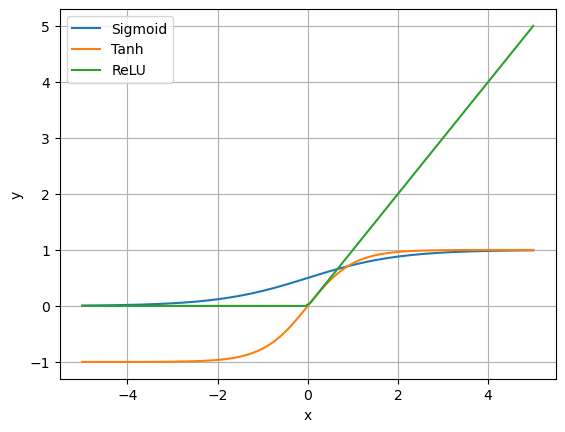

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Datos para graficar
x = np.linspace(-5, 5, 100)

# Graficar las funciones de activación
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')

# Configuraciones del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


In [35]:

#One of the central abstractions in Keras is the Layer class. A layer encapsulates both a state (the layer's "weights") and a transformation from inputs to outputs (a "call", the layer's forward pass).

class Linear(tf.keras.layers.Layer):
    def __init__(self, num_neurons, activation=None):
        super(Linear, self).__init__()
        self.num_neurons = num_neurons
        self.activation = activation

    def build(self, input_shape):
      self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]),self.num_neurons])

      self.bias = self.add_weight("bias", shape=[1,self.num_neurons])

        
    def call(self, inputs):
      x = tf.matmul(inputs,self.kernel) + self.bias #Primera capa neuronal
      
      if self.activation == 'relu':
        x = tf.nn.relu(x)
      elif self.activation == 'tanh':
        x = tf.math.tanh(x)
      else:
        x = tf.math.sigmoid(x)  #Aplicando la función sigmoide
      
      return x


In [36]:
# Definir la arquitectura neuronal

model = tf.keras.models.Sequential([vectorize_layer, Linear(30, activation="sigmoid")])
#model.add(Linear(20))
model.add(layers.Dropout(0.5))
model.add(Linear(6))

In [37]:
model(inp)

<tf.Tensor: shape=(16, 6), dtype=float32, numpy=
array([[0.29111782, 0.5393322 , 0.54800785, 0.75106764, 0.57724416,
        0.66417235],
       [0.31504682, 0.48917958, 0.47890285, 0.72890425, 0.5915263 ,
        0.643757  ],
       [0.33027637, 0.5419476 , 0.49403894, 0.7297534 , 0.5884216 ,
        0.67408264],
       [0.33974645, 0.49601695, 0.48249498, 0.73825234, 0.58615524,
        0.65004337],
       [0.3041569 , 0.52858716, 0.5020632 , 0.7363138 , 0.59404427,
        0.6331006 ],
       [0.34354112, 0.52461344, 0.44936505, 0.72258604, 0.6092316 ,
        0.63094836],
       [0.31871942, 0.49598396, 0.46415177, 0.7140647 , 0.6081958 ,
        0.6725391 ],
       [0.3537762 , 0.49517027, 0.4782368 , 0.71222806, 0.62717986,
        0.6544849 ],
       [0.31099975, 0.50268304, 0.46934032, 0.7100086 , 0.65479463,
        0.6307616 ],
       [0.31834617, 0.49391586, 0.489954  , 0.7357064 , 0.6151256 ,
        0.6640879 ],
       [0.3057152 , 0.48828706, 0.4940806 , 0.7285834 , 0.609

In [38]:
#Compilar

#Therefore, when using the framework of maximum likelihood estimation, we will implement a cross-entropy loss function, which often in practice means a cross-entropy loss function for classification problems and a mean squared error loss function for regression problems.
# Categorical cross entropy is a Softmax activation plus a Cross-Entropy loss. Source: https://gombru.github.io/2018/05/23/cross_entropy_loss/
# categorical_crossentropy needs one hot vector labels

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.optimizer.lr.assign(0.001) #learning rate


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.001>

## 4. Entrenamiento

- Proceso de carga de pesos de nuestro modelo

In [39]:
# IMPORTANTE
# Ejecutar esta celda si ya se tienen guardados los pesos resultado de un entrenamiento previo del modelo. 

# Restore the weights
model.load_weights('Weights_folder/weights')

# Evaluate the model
loss, acc = model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

445/445 - 1s - loss: 0.4431 - accuracy: 0.8373 - 1s/epoch - 3ms/step
Restored model, accuracy: 83.73%


- Proceso para generar nuevos pesos para nuestro modelo

In [ ]:
# Entrenar el modelo. (NO ES NECESARIO EJECUTAR ESTE BLOQUE SI CARGAN DATOS GUARDADOS)
# Guardamos en history para graficar los cambios en accuracy y loss en cada época.

epochs = 5
history = model.fit(train_ds, epochs=epochs, validation_data = val_ds)


In [ ]:
# (NO ES NECESARIO EJECUTAR ESTE BLOQUE SI CARGAN DATOS GUARDADOS)
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bx-', label = 'train')
ax1.plot(history.history['val_accuracy'], 'rx-', label='val')

ax1.set_title('Accuracy de entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bx-', label = 'train')
ax2.plot(history.history['val_loss'], 'rx-', label='val')
ax2.set_title('Error de entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')

# Mostrar figura
plt.legend()
plt.show()

- Evaluación del modelo con el conjunto cyberbullying_test

In [40]:
# Evaluación del modelo.

loss, accuracy = model.evaluate(test_ds)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# print("Evaluate")
# result = model.evaluate(test_ds)
# dict(zip(model.metrics_names, result))

445/445 [==============================] - 1s 3ms/step - loss: 0.4431 - accuracy: 0.8373
Test loss: 0.4431341290473938
Test accuracy: 0.8373367190361023


- Proceso para guardar información de los pesos de nuestro modelo

In [ ]:

# import module
#import tensorflow
 
#path='Weights_folder/Weights'
 
# save
#model.save_weights(path)
#model.save('ModeloFinal_BasileKeller.h5')

## 5. Matriz de confusión y reporte de clasificación

In [41]:
predicted_labels = model.predict(test_ds)

predicted_classes = np.argmax(predicted_labels, axis=1)

true_labels = np.concatenate([y for x, y in test_ds], axis=0)

true_labels = np.argmax(true_labels, axis=1)

445/445 [==============================] - 1s 2ms/step


[[6.35551851e-06 5.11353661e-04 1.50531741e-05 1.77845940e-01
  2.99425656e-03 5.32797771e-04]
 [6.13382726e-05 2.11378865e-04 1.48130275e-04 4.20884999e-06
  4.10240181e-02 1.33523410e-02]
 [1.12483604e-05 3.61229572e-03 1.67224708e-03 4.97179190e-06
  3.72460447e-02 1.28436133e-01]
 ...
 [9.08201940e-08 1.09775619e-05 4.61900473e-01 1.18961516e-07
  3.09032621e-04 5.25394244e-05]
 [1.04712193e-07 1.24455491e-05 4.48455185e-01 1.59546190e-07
  5.91493561e-04 1.35425973e-04]
 [2.26885872e-03 2.07778998e-02 8.92085209e-03 2.71601719e-04
  1.94041014e-01 1.81824788e-01]] 7119
[3 5 5 ... 2 2 5] 7119


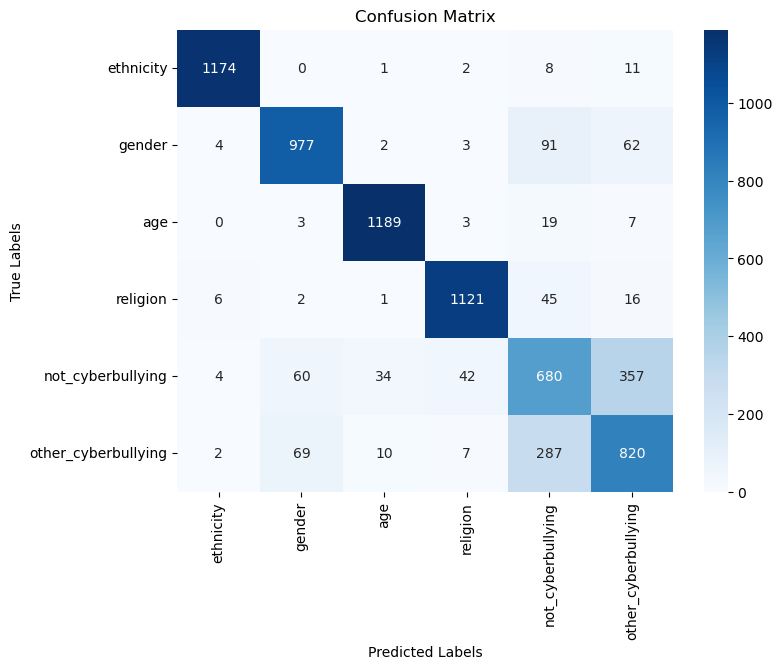

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(predicted_labels, len(predicted_labels))
print(true_labels, len(true_labels))
cm = confusion_matrix(true_labels, predicted_classes)

class_names = ["ethnicity","gender", "age", "religion", "not_cyberbullying", "other_cyberbullying"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [43]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_classes, labels=[0,1,2,3,4,5], target_names=class_names)
print(report)

                     precision    recall  f1-score   support

          ethnicity       0.99      0.98      0.98      1196
             gender       0.88      0.86      0.87      1139
                age       0.96      0.97      0.97      1221
           religion       0.95      0.94      0.95      1191
  not_cyberbullying       0.60      0.58      0.59      1177
other_cyberbullying       0.64      0.69      0.66      1195

           accuracy                           0.84      7119
          macro avg       0.84      0.84      0.84      7119
       weighted avg       0.84      0.84      0.84      7119



#
#
#

## Conclusiones

#### Basile Álvarez Andrés José

A lo largo de esta práctica, tuvimos como principal objetivo poner en práctica habilidades de programación de una red neuronal con TensorFlow para la clasificación multiclase de texto utilizando el conjunto de datos Cyberbullying Classification. 

Para lograr este objetivo, primeramente se importaron los tres conjuntos de datos etiquetados con los que trabajamos (train, test, validation). Estos conjuntos constan de una columna con un tweet y otra columna con la etiqueta correspondiente al tipo de bullying del tweet ("ethnicity","gender", "age", "religion", "not_cyberbullying", "other_cyberbullying"). No obstante, para poder trabajar con estos datos y utilizar técnicas de procesamiento de lenguaje natural, tuvimos que hacer un preprocesamiento donde eliminamos elementos duplicados, cadenas vacías, caracteres especiales (como emojis, arrobas, etc.), además de convertir el texto a minúsculas y eliminar los signos de puntuación (para esto último utilizamos la función translate de la biblioteca string). Al finalizar la primera parte del preprocesamiento de los datos, nos quedamos con 32,534 tweets en el conjunto de entrenamiento, 7119 tweets en el conjunto de prueba y 7118 tweets en el de validación (esto representa una división 82.1% elementos de entrenamiento y 17.9% elementos de prueba). 

Continuando con el preprocesamiento, se verifica la cantidad de elementos de cada clase con los que se cuenta en el conjunto de entrenamiento y, al ver que se cuenta con una cantidad muy similar de elementos clasificados en cada una de las clases, decidimos mantener todos los elementos para el entrenamiento del modelo. 

Posteriormente, dado que el problema con el que trabajamos es de clasificación de datos nominales, y para maximizar el rendimiento de nuestra red neuronal, se convirtieron los nombres de clases de las etiquetas en vectores codificados como one hot. De esta forma, se obtiene una clasificación que asegura que el modelo dé la misma importancia a todas las clases y que no asuma relaciones entre las clases. Además, la representación one hot de las etiquetas nos permitió trabajar con la función de pérdida "categorical cross entropy", que solicita esta forma de representar las clases. 

Una vez hecho el mapeo a vectores one hot para las etiquetas, podemos definir los valores de X y y (tweet y etiqueta) como arreglos de numpy con los que posteriormente utilizamos la función "from_tensor_slices" para definir los tensores "raw" de entrenamiento, prueba y validación. Luego, utilizamos el método "TextVectorization" con un tamaño de vocabulario máximo de 10,000 tokens para convertir las cadenas "raw" de texto a una representación vectorial que esté lista para ser leída e interpretada por nuestra red neuronal. 

Más tarde, definimos el tamaño de "batch" (o número de muestras procesadas antes de actualizar el modelo) en 16, asegurándonos de que obtuviéramos el mejor balance entre rendimiento e información procesada antes de actualizar los parámetros del modelo. Al finalizar este paso, obtuvimos los batches para cada uno de los tres conjuntos (train_ds, val_ds, test_ds), y éstos fueron los que utilizamos para nuestra red neuronal.  

Ya dentro de la definición de nuestro modelo, utilizamos la clase "Linear" para crear capas de nuestra red neuronal y allí asignar los pesos, el vector de sesgo y las funciones de activación (en este caso definimos "relu", "tanh" y "sigmoide", pero únicamente utilizamos "sigmoide" en el entrenamiento de nuestro modelo). 

Luego, gracias a la facilidad que da TensorFlow para crear redes neuronales, la definición de nuestro modelo consistió en definir una capa de 30 neuronas con activación sigmoide (con la que obtuvimos los mejores resultados), un dropout de 0.5 (que "apaga" la mitad de las neuronas luego de la activación en la capa previa, pero que nos permitió evitar el sobreajuste y obtener buenos resultados con el conjunto de prueba) y una capa final con seis neuronas, representando las 6 posibles clases o etiquetas de salida a las que pertenecerá un tweet. 

Compilamos el modelo utilizando la función de pérdida "categorical_crossentropy", la cual encontramos que funciona como una función de activación "softmax" y una función de pérdida de entropía cruzada, óptima para problemas de clasificación multiclase, y que toma requiere la codificación de las etiquetas en formato one hot. Además, pasamos como parámetro a la función compile el optimizador "adam", que es una extensión del descenso de gradiente estocástico con muy buenos resultados en aplicaciones de procesamiento de lenguaje natural. Finalmente, antes de entrenar definimos la tasa de aprendizaje en 0.001, la cual nos trajo los mejores resultados para nuestro problema. 

Entrenar el modelo, ya habiendo definido todos los parámetros previamente, fue tan sencillo como llamar al método "fit" de tensorflow. Para la evaluación, utilizamos el método "evaluate", el cual arrojó un accuracy del 83.37% en la clasificación de tweets del conjunto de prueba (nunca visto por el modelo hasta la evaluación). 

Finalmente, se hizo la matriz de confusión y el reporte de clasificación, donde observamos que el modelo se comporto de muy buena manera para la clasificación de tweets de bullying por etnia, género, edad y religión (precisiones de 99, 88, 96 y 95%, respectivamente) y un poco peor para tweets de las clases not_cyberbullying y other_cyberbullyng (precisiones del 60 y 64%, respectivamente). Esto puede deberse a diversos factores, entre los cuales se encuentra el número de muestras de esta clase de tweets en nuestro conjunto de entrenamiento (fueron las dos clases con menor número de muestras) o a factores propios de la configuración del modelo. 

En general, nos encontramos muy satisfechos con los resultados de este ejercicio de programación utilizando redes neuronales con TensorFlow, y creemos que fue muy importante realizarlo para entender de mejor manera el funcionamiento de estos modelos, así como para practicar antes de realizar nuestro proyecto final. 



#
#
#

#### Keller Ascencio Rodolfo Andrés


El objetivo principal de este programa se enfocaba en que los alumnos pusieran en práctica las habilidades de programación de una red neuronal en TensorFlow para la clasificación de múltiples clases de texto a través de un conjunto de datos Cyberbullying Classification. El conjunto de datos se subdividía en tres, de entre los cuales se trabajó con un conjunto train de entrenamiento que contaba con 33384 registros, un conjunto val de prueba que contaba con 7154 registros y un conjunto test de validación que contaba con 7154 registros.

La clasificación multiclase a trabajar se dividía en seis clases de tipo de cyberbullying entre los que se encontraban textos que no presentaban cyberbullying y textos que presentaban cyberbullying por etnia, género, edad, religión y por cualquier otro tipo de cyberbullying. 

Para la realización de este programa inicialmente se trabajó el preprocesamiento del texto. Para esto se leyeron cada uno de los tres conjuntos de datos y se almacenaron en tres variables separadas a las cuales se les eliminó las cadenas vacías, los registros duplicados, las cadenas de espacios y los signos de puntuación, emoticonos y símbolos que se presentaran dentro de los registros, buscando quedarnos únicamente con palabras para así finalmente pasar a minúscula los textos. 

Tras esto se evaluó el número de registros de cyberbullying que se contaba por cada clase dentro del conjunto de entrenamiento, donde se apreciaron valores un tanto similares para cada uno de los conjuntos a clasificar, siendo un buen conjunto para el entrenamiento de nuestro modelo debido a su gran tamaño y no tan alto sesgo de los datos. Por otro lado, para la preparación de los datos teníamos que trabajar con las etiquetas de clase, debido a que estas etiquetas se presentaron como cadenas, por lo cual tuvimos que modificarlos para que se adecuaran a una etiqueta de tipo entera que posteriormente pasara a un vector one hot mediante el uso del método map. Todo esto formó parte de la preparación de los datos para la generación de nuestro modelo.

Como siguiente paso, para la alimentación y validación de nuestro modelo tuvimos que transformar los conjuntos de tweets y etiquetas a arreglos de la biblioteca numpy para luego usar estos arreglos con la función from_tensor_slices() para trabajar con los tensores a utilizar. Del conjunto de tweets se seleccionó un tamaño de vocabulario de diez mil palabras, siendo que estas palabras serían las más frecuentes dentro de los tweets, siendo escogidas a través de la función TextVectorization que hace uso de TF-IDF, medida numérica que expresa cuán relevante es una palabra para un documento en una colección a través de la frecuencia inversa de documento.

Después se eligió el número de muestras que se introducen a la red neuronal para ser procesadas en cada época. Si el número era muy pequeño, la red tenía poca cantidad de datos en memoria, entrena más rápido, pero considera menos características y detalles significativos. En contraparte, si era un valor grande el modelo tardaba más tiempo en entrenar, pero tomaba más en cuenta las características significativas y detalladas del modelo.

Posteriormente se trabajó la clase Linear del modelo, donde definimos la matriz de pesos kernel, el vector de sesgo bias y la función de activación donde permitimos que el modelo trabajara tanto con funciones relu, tanh y sigmoide a pesar de que al final con la función sigmoide obtuvimos los mejores resultados de nuestro modelo.

Para la arquitectura de nuestra red neuronal decidimos trabajar con dos capas, la primera contaba con treinta neuronas y la última con seis neuronas debido al número de clases que trabajamos en nuestra clasificación. Para ambas capas neuronales hacemos uso de la función de activación sigmoide. De misma manera, se trabajó con un dropout del 50%, lo que significa que al momento del entrenamiento del modelo la mitad de las neuronas se "apagaban" para evitar un sobreajuste de nuestro modelo.

Con respecto a la función compile se definió a categorical_crossentropy como función de pérdida, siendo una función ideal al trabajar con clasificación multiclase requiriendo de los vectores one hot como formato de las etiquetas de clase en la entrada del modelo y el cual hace uso de Softmax como función de activación. Como optimizador utilizamos Adam, Adaptive Moment Estimation, recomendado por el profesor al generar buenos resultados en problemas de procesamiento de lenguaje natural. La tasa de aprendizaje utilizada fue de 0.001, siendo la que mejor resultado nos trajo al momento de realizar pruebas.

Tras haber definido nuestro modelo se realizó su entrenamiento trabajando con cinco épocas y obteniendo una precisión general del 83.73%  y una pérdida de 0.4431 al trabajar con el conjunto test para su evaluación. Como métricas de desempeño se obtuvo la matriz de confusión del modelo y un reporte de clasificación para cada una de las clases, donde en la matriz de confusión se aprecia que la mayor cantidad de errores se tienen entre la clasificación de tweets que no cuentan con cyberbullying y tweets con un distinto tipo de cyberbullying al de las clases definidas como etnia, género, edad y religión. Considero que esto ocurrió debido a que la cantidad de registro de estas clases era menor que al de las otras, además de que a mi parecer al buscar clasificar otros tipos de cyberbullying estamos tomando en cuenta una gran cantidad de palabras que representan una gran cantidad de tipos de cyberbullying, por lo cual el modelo no se adapta tan bien a estas categorías generalizadas y puede tener cierta confusión con otras categorías como lo es el no tener cyberbullying en tweets, sobre todo debido a la frecuencia de aparición de las palabras en los tweets de estos distintos tipos de bullying. Las clases not_cyberbullying con una precisión del 60% y other_cyberbullying con una precisión del 64% fueron las clases que tuvieron una peor precisión de clasificación, mientras que las clases ethnicity 99%, gender 88%, age 96% y religion 95% tuvieron valores altos de precisión. Para apreciar a mayor detalle el reporte de clasificación se puede acceder al apartado dentro de este notebook.

Al haber obtenido un modelo preciso tras varias pruebas, hicimos uso de las funciones save_weights y save para almacenar los valores de los pesos de las épocas y el modelo para poder reproducir nuestro entenamiento y replicarlo a partir del conjunto de datos y los mismos pesos de la red neuronal. Para poder cargar el modelo y los pesos se hace uso de la función load_weights.

Finalmente, puedo concluir que esta práctica fue sumamente útil para ayudarme a comprender los pasos que se deben realizar para el preprocesamiento de los datos, así como la manera en la cual se construye el modelo de una red neuronal, donde el mayor reto así como el mayor aprendizaje se obtuvo al entender el papel y la importancia que juega cada uno de los parámetros de los elementos que forman nuestro modelo de red neuronal, siendo que al encontrar una combinación buena entre estos parámetros se podía obtener un modelo bueno para la evaluación y clasificación del cyberbullying en tweets.


# Apéndice


## Algunas notas sobre TF



Compile -> model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

        donde: 
            Loss function = Medir qué tan accurate es el modelo en el entrenamiento. Hay que minimizar esta función. Podemos usar MSE, MAE, ...
            Optimizer = Adam, Adadelta, etc. This is how the model is updated based on the data it sees and its loss function.
            Metrics = Used to monitor the training and testing steps. En el ejemplo anterior, se utiliza accuracy
        


Fit -> model.fit(train_images, train_labels, epochs=10)
        
        donde:
            Pasamos los datos de entrenamiento (en este caso el texto y su clasificación)



Evaluate -> test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
            print('\nTest accuracy:', test_acc)


Predict -> probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
            
            en esta primer función, utilizamos softmax para convertir la salida en probabilidades
            
            predictions = probability_model.predict(test_images)
            
            con predict, obtenemos el label para cada dato en el conjunto de datos de pruebas


https://www.tensorflow.org/tutorials/keras/classification








The batch size is a number of samples processed before the model is updated. The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

The number of epochs is the number of complete passes through the training dataset.

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

## Prepare the dataset for training

Next, you will standardize, tokenize, and vectorize the data using the tf.keras.layers.TextVectorization layer.

    Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset.
    Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words by splitting on whitespace).
    Vectorization refers to converting tokens into numbers so they can be fed into a neural network.
    
https://www.tensorflow.org/tutorials/load_data/text


## Layer

A layer is a callable object that takes as input one or more tensors and that outputs one or more tensors. It involves computation, defined in the call() method, and a state (weight variables). 

build(self, input_shape): This method can be used to create weights that depend on the shape(s) of the input(s), using add_weight(), or other state. __call__() will automatically build the layer (if it has not been built yet) by calling build().
call(self, inputs, *args, **kwargs): Called in __call__ after making sure build() has been called. call() performs the logic of applying the layer to the inputs. The first invocation may additionally create state that could not be conveniently created in build(); see its docstring for details. Two reserved keyword arguments you can optionally use in call() are:

    training (boolean, whether the call is in inference mode or training mode). See more details in the layer/model subclassing guide
    mask (boolean tensor encoding masked timesteps in the input, used in RNN layers). See more details in the layer/model subclassing guide A typical signature for this method is call(self, inputs), and user could optionally add training and mask if the layer need them. *args and **kwargs is only useful for future extension when more input parameters are planned to be added

#
#
#
   

In [91]:
# model = Sequential([
#   vectorize_layer,                  #Vectores TF IDF
#   Linear(3, activation='sigmoid'),  #3 neuronas
#   Linear(6)                         #1 neurona de salida, 1 es Fake News, 0 es Real News
# ])

# lr = 0.01                          #Tasa de aprendizaje (Muy alta rebota mucho, muy chica tarda mucho)
# opt = tf.keras.optimizers.experimental.SGD(lr)  #Definimos optimizador

In [92]:
# model(inp)

In [93]:
# model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(len(vectorizer.get_feature_names()),)))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

# # Compilar el modelo
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Entrenar el modelo
# epochs = 10
# batch_size = 32
# model.fit(train_vectors, train_labels, validation_data=(val_vectors, val_labels), epochs=epochs, batch_size=batch_size)

# # Evaluar el modelo en el conjunto de prueba
# loss, accuracy = model.evaluate(test_vectors, test_labels)
# print(f"Test loss: {loss}")
# print(f"Test accuracy: {accuracy}")

In [ ]:
# model = tf.keras.models.Sequential([vectorize_layer, Linear(1, activation="relu")])
# model.add(Linear(8))
# model.add(layers.Dropout(0.5))
# model.add(Linear(6,activation="sigmoid"))
# https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

# 82.51
# lr = 0.01
# model = tf.keras.models.Sequential([vectorize_layer, Linear(20, activation="sigmoid")])
# #model.add(Linear(20))
# model.add(layers.Dropout(0.5))
# model.add(Linear(6))